In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model= torchvision.models.detection.maskrcnn_resnet50_fpn(weights= 'DEFAULT')

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 93.7MB/s]


In [ ]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

COCO categories:
{0: u'__background__',
 1: u'person',
 2: u'bicycle',
 3: u'car',
 4: u'motorcycle',
 5: u'airplane',
 6: u'bus',
 7: u'train',
 8: u'truck',
 9: u'boat',
 10: u'traffic light',
 11: u'fire hydrant',
 12: u'stop sign',
 13: u'parking meter',
 14: u'bench',
 15: u'bird',
 16: u'cat',
 17: u'dog',
 18: u'horse',
 19: u'sheep',
 20: u'cow',
 21: u'elephant',
 22: u'bear',
 23: u'zebra',
 24: u'giraffe',
 25: u'backpack',
 26: u'umbrella',
 27: u'handbag',
 28: u'tie',
 29: u'suitcase',
 30: u'frisbee',
 31: u'skis',
 32: u'snowboard',
 33: u'sports ball',
 34: u'kite',
 35: u'baseball bat',
 36: u'baseball glove',
 37: u'skateboard',
 38: u'surfboard',
 39: u'tennis racket',
 40: u'bottle',
 41: u'wine glass',
 42: u'cup',
 43: u'fork',
 44: u'knife',
 45: u'spoon',
 46: u'bowl',
 47: u'banana',
 48: u'apple',
 49: u'sandwich',
 50: u'orange',
 51: u'broccoli',
 52: u'carrot',
 53: u'hot dog',
 54: u'pizza',
 55: u'donut',
 56: u'cake',
 57: u'chair',
 58: u'couch',
 59: u'potted plant',
 60: u'bed',
 61: u'dining table',
 62: u'toilet',
 63: u'tv',
 64: u'laptop',
 65: u'mouse',
 66: u'remote',
 67: u'keyboard',
 68: u'cell phone',
 69: u'microwave',
 70: u'oven',
 71: u'toaster',
 72: u'sink',
 73: u'refrigerator',
 74: u'book',
 75: u'clock',
 76: u'vase',
 77: u'scissors',
 78: u'teddy bear',
 79: u'hair drier',
 80: u'toothbrush'}

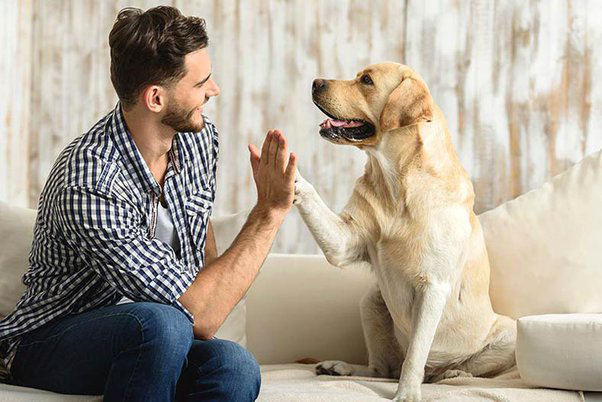

In [ ]:

img= Image.open('/content/main-qimg-51d9dbbf0070a40e60d3e7652070e8f3-lq.jfif')
img

In [ ]:
transform= T.ToTensor()
ig= transform(img)

In [ ]:
with torch.no_grad():
    pred= model([ig])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [ ]:
pred[0]['labels'], pred[0]['scores'], pred[0]['labels'].shape
# 1 is human class & 18 is dog class.

(tensor([ 1, 18, 63, 63,  1, 63, 63, 65, 17, 63,  1,  1, 65, 62, 62, 62, 65,  1,
         63, 63, 65, 65, 65]),
 tensor([0.9989, 0.9933, 0.4888, 0.4269, 0.3694, 0.2520, 0.2225, 0.1955, 0.1389,
         0.1326, 0.1231, 0.1168, 0.1134, 0.1043, 0.1025, 0.0795, 0.0693, 0.0667,
         0.0646, 0.0601, 0.0564, 0.0563, 0.0502]),
 torch.Size([23]))

In [ ]:
masks= pred[0]['masks']


In [ ]:
masks.shape

torch.Size([23, 1, 402, 602])

In [ ]:
mask= masks[1, 0]
mask

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
mask.unique()

tensor([0.0000e+00, 5.8489e-07, 7.3535e-07,  ..., 9.9959e-01, 9.9960e-01,
        9.9960e-01])

In [ ]:
mask= masks[1,0] > .5 #masks[1,0] refers to dog
mask

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [ ]:
mask.unique()

tensor([False,  True])

In [ ]:
dog_mask= mask.numpy().astype('uint8')*255 #so, it becomes black 0 & white255

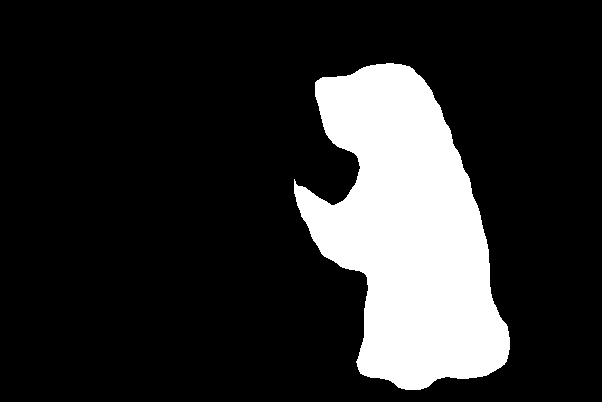

In [ ]:
cv2_imshow(dog_mask)

In [ ]:
igg= cv2.imread('/content/main-qimg-51d9dbbf0070a40e60d3e7652070e8f3-lq.jfif')

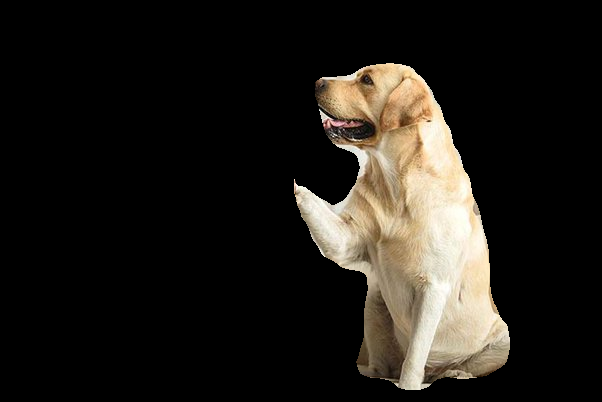

In [ ]:
fin_img= cv2.bitwise_and(igg, igg, mask= dog_mask)
cv2_imshow(fin_img)

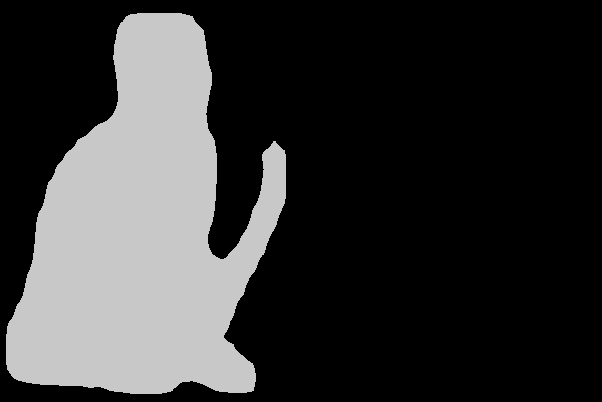

In [ ]:
mask2= masks[0,0] > .7
human_mask= mask2.numpy().astype('uint8')*200
cv2_imshow(human_mask)

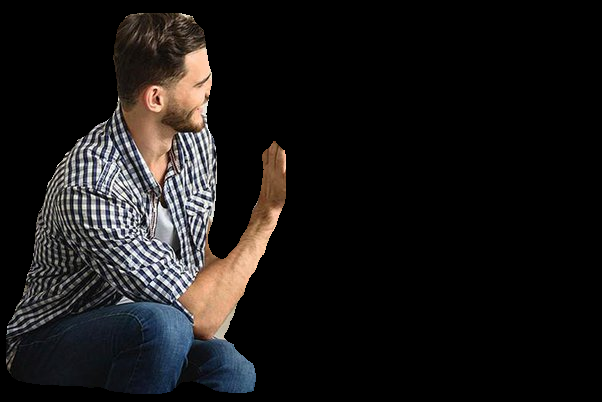

In [ ]:
fin_img2= cv2.bitwise_and(igg, igg, mask= human_mask)
cv2_imshow(fin_img2)

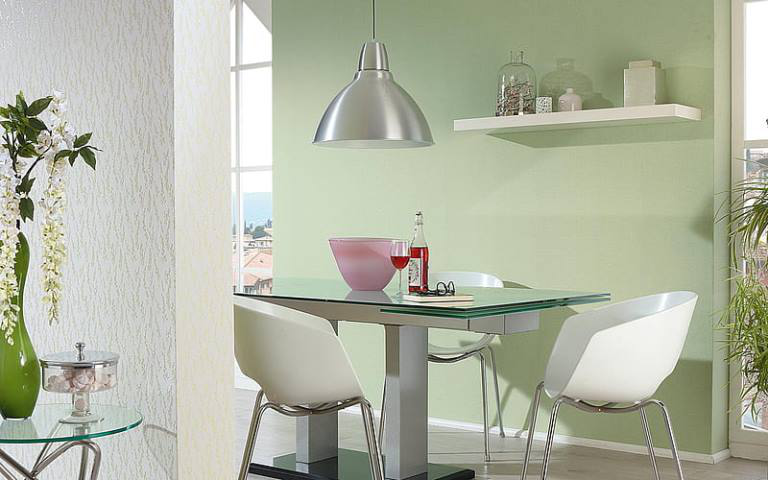

In [ ]:
img2= Image.open('/content/wallpaper.jpg')
img2

In [ ]:
ig2= transform(img2)

In [ ]:
with torch.no_grad():
  pred= model([ig2])

In [ ]:
pred[0]['labels'], pred[0]['scores'], pred[0]['labels'].shape

(tensor([62, 62, 44, 44, 44, 46, 86, 64, 64, 67, 51, 64, 67, 62, 86, 62, 44, 62,
         47, 51, 86, 67, 64, 62, 87, 67, 86, 51, 64, 47, 81, 67, 67, 62, 62, 47,
         81, 84, 44, 86, 62, 81, 67, 86, 44]),
 tensor([0.9979, 0.9958, 0.9953, 0.9673, 0.9572, 0.9544, 0.8697, 0.8654, 0.8046,
         0.7572, 0.7187, 0.6345, 0.5773, 0.5266, 0.5142, 0.4708, 0.3242, 0.2407,
         0.2282, 0.1899, 0.1889, 0.1769, 0.1725, 0.1710, 0.1289, 0.1188, 0.1041,
         0.0967, 0.0893, 0.0855, 0.0771, 0.0764, 0.0741, 0.0735, 0.0629, 0.0615,
         0.0604, 0.0591, 0.0589, 0.0571, 0.0541, 0.0529, 0.0517, 0.0517, 0.0505]),
 torch.Size([45]))

In [ ]:
masks= pred[0]['masks']

In [ ]:
mask= masks[0,0] > .7

In [ ]:
obj_mask= mask.numpy().astype('uint8')*255
obj_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

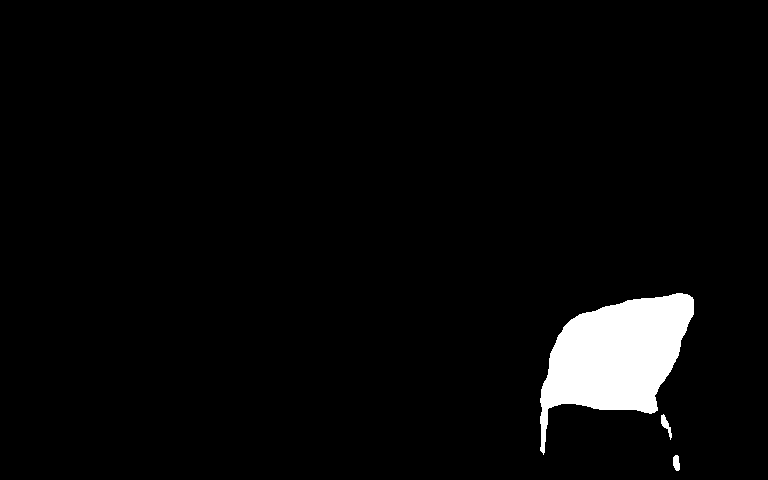

In [ ]:
cv2_imshow(obj_mask)

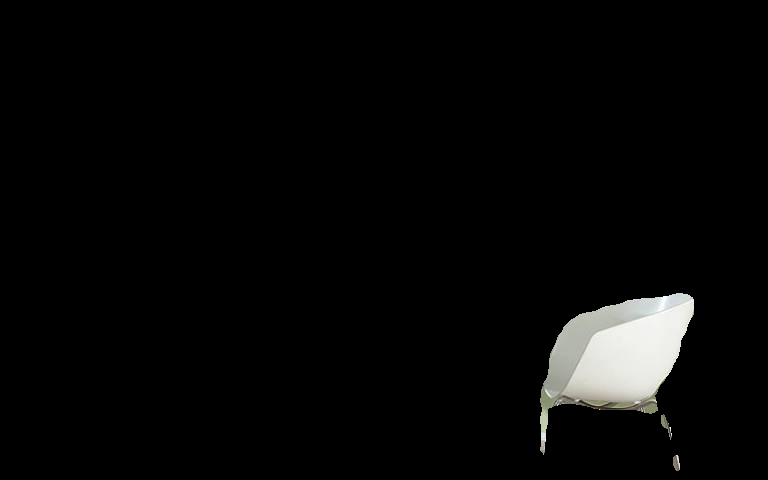

In [ ]:
igg2= cv2.imread('/content/wallpaper.jpg')
fin_img2= cv2.bitwise_and(igg2, igg2, mask= obj_mask)
cv2_imshow(fin_img2)

In [ ]:
mask= masks[5,0] > .7

In [ ]:
obj_mask= mask.numpy().astype('uint8')*255


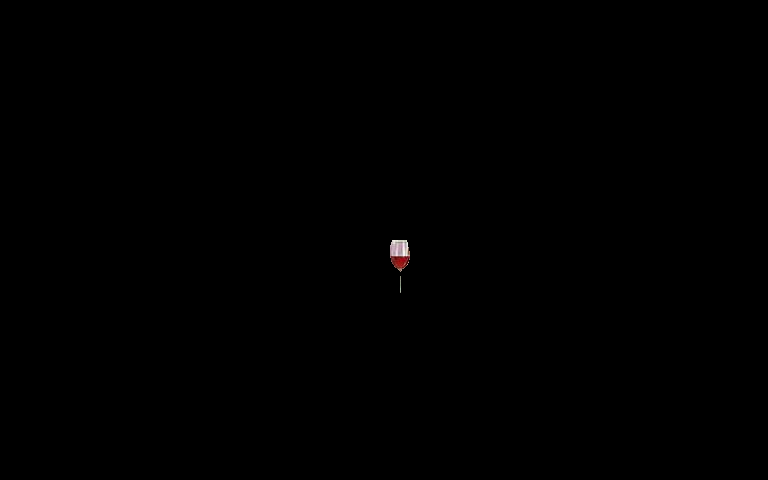

In [ ]:
fin_img2= cv2.bitwise_and(igg2, igg2, mask= obj_mask)
cv2_imshow(fin_img2)